---
# **REDES NEURONALES ARTIFICIALES**  
**Formato IEEE – Ingeniería Electrónica**  
**Autor:** David Arias, Keneth Montiel.  
**Fecha:** Septiembre 2025  

---
---

---
## **Introducción**

Las **Redes Neuronales Artificiales** (RNA) representan una de las herramientas más poderosas y versátiles de la inteligencia artificial moderna.

En un mundo donde la información crece de forma exponencial, las RNA permiten descubrir relaciones ocultas, predecir comportamientos y automatizar decisiones, desde el reconocimiento de voz y de imágenes, hasta la conducción autónoma y la detección temprana de enfermedades.

La idea fundamental es **aproximar funciones** y la capacidad de aprender representaciones jerárquicas hace que sean la base del *deep learning* moderno.

---
---

---
## **1. ¿Qué es una Red Neuronal Artificial?**

Una RNA es un **sistema de procesamiento distribuido** inspiradas en la estructura y el funcionamiento del cerebro humano, estas redes están formadas por capas de neuronas interconectadas que procesan información de manera no lineal, aprendiendo patrones complejos a partir de datos masivos.

Lo fascinante de estas redes no radica solo en su capacidad de imitar ciertos procesos cognitivos, sino en su habilidad para adaptarse. A diferencia de los algoritmos tradicionales, una RNA ajusta de forma automática sus parámetros internos —pesos y sesgos— mediante un proceso iterativo de entrenamiento, mejorando su desempeño cada vez que se expone a más datos.

Las RNA más comunes tienen al menos tres capas:

1. **Capa de entrada**: recibe los datos de entrada.  
2. **Capas ocultas**: hacen transformaciones lineales seguidas de activaciones no lineales.  
3. **Capa de salida**: produce la predicción.

El flujo de datos (en una red feedforward típica) es:

$$
\mathbf{x} \; \rightarrow \; \text{(Capa Entrada)} \; \rightarrow \; \text{(Capa Oculta(s))} \; \rightarrow \; \text{(Capa Salida)} \; \rightarrow \; \hat{y}
$$

Durante el entrenamiento se usa retropropagación (backpropagation) para ajustar los pesos, minimizando una función de costo.

---
---


---
## **2. ¿Cómo funciona? Arquitectura y flujo de datos**

- **Propagación hacia delante**

Las redes neuronales funcionan tomando una media ponderada más un término de sesgo y aplicando una función de activación para añadir una transformación no lineal. En la formulación de la media ponderada, cada peso determina la importancia de cada característica (es decir, cuánto contribuye a predecir la salida).

<div align="center" style="font-size:135%">
$$
z = \sum_{i=1}^{n} w_i x_i + b,
\qquad
a = \phi(z)
$$
</div>

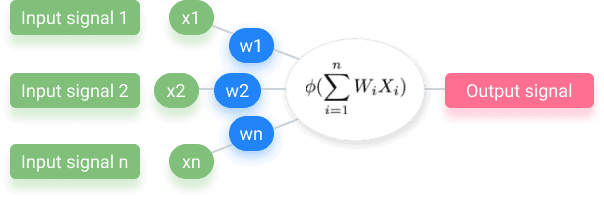

*Fuente principal:* Nico Klingler, *Artificial Neural Network: Everything You Need to Know*, Viso.ai (2023).

---
---

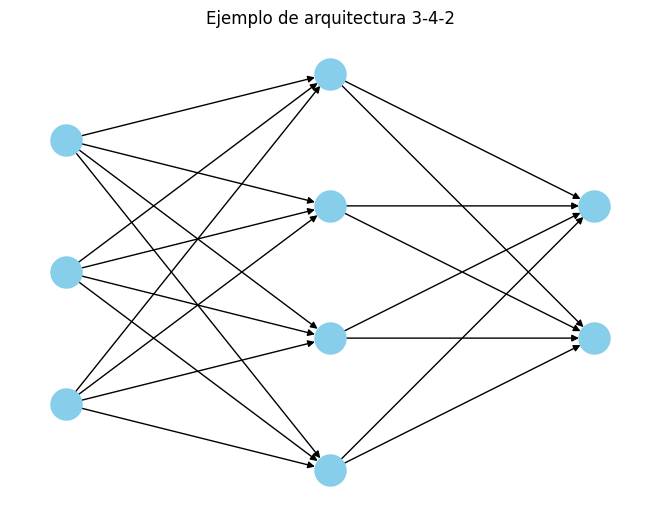

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
layers = [3,4,2]  # nodos por capa
pos = {}
k = 0
for i,n in enumerate(layers):
    for j in range(n):
        pos[k] = (i, j - n/2)
        k += 1
edges=[]
for i in range(layers[0]):
    for j in range(layers[0], layers[0]+layers[1]):
        edges.append((i,j))
for i in range(layers[0], layers[0]+layers[1]):
    for j in range(layers[0]+layers[1], sum(layers)):
        edges.append((i,j))
G.add_edges_from(edges)
nx.draw(G, pos, with_labels=False, node_size=500, node_color="skyblue")
plt.title("Ejemplo de arquitectura 3-4-2")
plt.show()

---
## **2.1 Funciones de Activación**
Las funciones de activación introducen **no linealidad**, elemento clave para que la red modele relaciones complejas.
<div align="center" style="font-size:135%">
La elección de \(\phi\) influye directamente en la velocidad de entrenamiento y el rendimiento final.
</div>

Algunas funciones de activación comunes:
* **Sigmoide**: comprime cualquier valor real a un rango entre 0 y 1, con forma de “S”.

  $$
  \sigma(z)=\frac{1}{1+e^{-z}}
  $$
Útil cuando se necesitan probabilidades, pero puede provocar gradientes muy pequeños (“desvanecimiento”).

* **ReLU** (*Rectified Linear Unit*): deja pasar tal cual los valores positivos y convierte en 0 los negativos.

  $$
  \phi(z)=\max(0,z)
  $$
  Es la más usada en capas ocultas porque es simple y acelera el aprendizaje, aunque puede “apagar” neuronas si quedan en cero.

* **Tangente Hiperbólica**: transforma los valores a un rango entre -1 y 1, también con forma de “S”, pero centrada en cero.

  $$
  \tanh(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
  $$
  Mantiene un balance entre positivos y negativos, lo que ayuda a que el modelo aprenda más rápido en casos donde la media está cerca de cero lo que lo hace mas optimo que utilizar la sigmoide.

* **Softmax:** Convierte un **vector de valores** (logits) en una **distribución de probabilidad.**

  $$
  \text{softmax}(z_i)=\frac{e^{z_i}}{\sum_j e^{z_j}}
  $$
  Útil en la capa de salida para **clasificación multiclase**, Cada valor queda entre 0 y 1 y la suma total es 1.

---
---


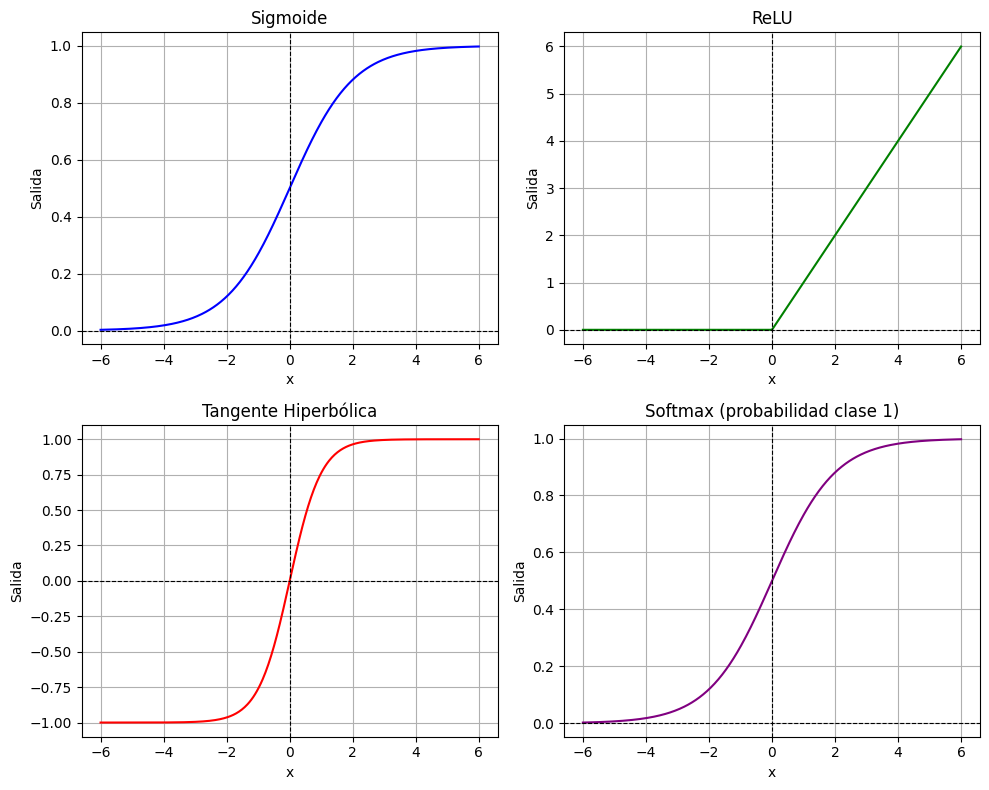

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de entrada
x = np.linspace(-6, 6, 400)

# Funciones de activación
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)
softmax = np.exp(x) / (np.exp(x) + np.exp(0))   # softmax para dos clases [x,0]

# Crear figura con subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 1. Sigmoide
axs[0,0].plot(x, sigmoid, color="blue")
axs[0,0].set_title("Sigmoide")
axs[0,0].grid(True)

# 2. ReLU
axs[0,1].plot(x, relu, color="green")
axs[0,1].set_title("ReLU")
axs[0,1].grid(True)

# 3. Tanh
axs[1,0].plot(x, tanh, color="red")
axs[1,0].set_title("Tangente Hiperbólica")
axs[1,0].grid(True)

# 4. Softmax (2 clases)
axs[1,1].plot(x, softmax, color="purple")
axs[1,1].set_title("Softmax (probabilidad clase 1)")
axs[1,1].grid(True)

# Etiquetas comunes
for ax in axs.flat:
    ax.axhline(0, color="black", lw=0.8, ls="--")
    ax.axvline(0, color="black", lw=0.8, ls="--")
    ax.set_xlabel("x")
    ax.set_ylabel("Salida")

plt.tight_layout()
plt.show()


---
## 3. Cómo asignar el valor de los pesos y los sesgos
La inicialización del peso es el primer componente de la arquitectura de la red neuronal. Los pesos iniciales los fijamos para definir el punto de partida del proceso de optimización del modelo de red neuronal.

- **Inicialización cero:** significa que los pesos se inicializan como cero. No es una buena solución, ya que nuestra red neuronal no rompería la simetría: no aprendería. Siempre que se utilice un valor constante para inicializar los pesos de una red neuronal, podemos esperar que su rendimiento sea deficiente, ya que todas las capas aprenderán lo mismo.

- **La inicialización aleatoria:** rompe la simetría, lo que significa que es mejor que la inicialización cero, pero algunos factores pueden determinar la calidad general del modelo. Por ejemplo, si los pesos se inicializan aleatoriamente con valores y se aplica una función de activación sigmoide el resultado es un valor próximo a uno, mientras que si se inicializan aleatoriamente con valores pequeños aplicando una función sigmoide se obtendrá un valor próximo a cero, lo que también ralentiza el aprendizaje.


---
---


---
## 3. Cómo asignar el valor de los pesos y los sesgos
- **Inicialización de Xavier/Glorot**
Es habitual ver este enfoque de inicialización siempre que se aplica una función de activación tanh o sigmoide a la media ponderada. El objetivo de esta técnica de inicialización es mantener igual la varianza en toda la red para evitar el problema de explosión o desvanecimiento de gradiente.

- **Inicialización de He/Kaiming**
La diferencia con respecto a la anterior es que se utiliza un factor de escala diferente para los pesos que tiene en cuenta la no linealidad de las funciones de activación. Por tanto, cuando se utiliza la función de activación ReLU en las capas, la inicialización de He es el enfoque recomendado.

---
---


---
# 4. Terminos a tener en cuenta
**Hiperparámetros:**
- Son valores definidos antes del entrenamiento que determinan la arquitectura y el proceso de aprendizaje de una red neuronal artificial (RNA).  
- Afectan la **capacidad de generalización**, la **velocidad de convergencia** y el **costo computacional**.  

Su ajuste cuidadoso es esencial para obtener un rendimiento óptimo.

**Neuronas de Entrada:**
- Representan las **variables de entrada** del conjunto de datos.  
- Cada característica normalizada o codificada se mapea a **una neurona**.  
- **Ejemplo:** Imágenes de 28×28 píxeles ⇒ $$28 \times 28 = 784--->neuronas-de-entrada. $$
- Una definición precisa evita pérdida de información y asegura que la red reciba todos los patrones relevantes.

---
---

---
# 4. Terminos a tener en cuenta
**Capas Ocultas**

Son los “procesadores intermedios” de una red neuronal, reciben la información de las entradas, la transforman y codifican paso a paso para que la capa de salida pueda tomar una decisión o hacer una predicción.

Su papel, a grandes rasgos es:
1. **Combinación lineal:**
Cada neurona de la capa calcula una suma ponderada de las salidas de la capa anterior más un sesgo.

2. **No linealidad con función de activación:**
Ese valor z se pasa por una función de activacion para introducir no linealidad, lo que permite que la red aprenda patrones complejos y no solo relaciones lineales.

3. **Extracción de características:**
A medida que los datos atraviesan varias capas, cada una aprende representaciones más abstractas, las primeras capas pueden detectar patrones simples (bordes en una imagen, por ejemplo).
Las posteriores combinan esas características para reconocer formas, objetos o relaciones de alto nivel.
- **Neuronas por capa:**  
  - Regla empírica:  
$$
    n_{\text{hidden}} \approx \frac{n_{\text{input}} + n_{\text{output}}}{2}
$$  
  - Aumentar gradualmente si existe *underfitting*, reducir si hay *overfitting*.  
- Más capas y neuronas aumentan capacidad, pero también riesgo de sobreajuste y mayor tiempo de entrenamiento.

---
---

---
# 4. Terminos a tener en cuenta
**Neuronas de Salida:**
son las que entregan el resultado final del modelo después de que la información ha pasado por todas las capas ocultas. Su funcionamiento, de forma sencilla es:

1. **Reciben entradas:** cada neurona de salida toma los valores ya procesados por la última capa oculta.
2. **Aplican una función de activación según el tipo de tarea:**

- **Clasificación binaria:** se usa normalmente sigmoide, que da una probabilidad entre 0 y 1.

- **Clasificación multiclase:** se usa softmax, que produce una probabilidad para cada clase y todas suman 1.

- **Regresión:** a menudo se deja sin activación (lineal) para poder dar cualquier valor real.

3. **Entregan la predicción:** el valor activado es la salida de la red, por ejemplo, la clase más probable, la probabilidad de un evento o un número continuo.

En pocas palabras, las neuronas de salida son el “traductor final” que convierte todo el cálculo interno en un resultado interpretable según el problema que quieras resolver. Una configuración adecuada garantiza resultados interpretables y estables.

---
---

---
# 4. Terminos a tener en cuenta
**Tamaño de Lote** (*Batch Size*)
Es el “paquete de datos” que la red ve antes de cada ajuste; elegirlo balancea velocidad, memoria y calidad de aprendizaje, indica cuántos ejemplos de entrenamiento procesa la red antes de actualizar sus pesos en una iteración.

- Se divide el conjunto de datos en lotes del tamaño elegido (por ejemplo, 32 muestras por lote).

- Para cada lote, la red hace un forward pass (calcula la salida), mide el error y hace un backpropagation para ajustar los pesos.

- Cuando se procesan todos los lotes, se completa una época.

**Efecto del tamaño:**

Lote pequeño (p.ej. 16 o 32): actualizaciones más frecuentes, aprendizaje más ruidoso pero mejor capacidad de generalización y menor uso de memoria.

Lote grande (p.ej. 256 o más): entrenamiento más estable y rápido por iteración, pero requiere más memoria y puede atascarse en mínimos locales.

**Escalado de Funciones**
- Normalizar o estandarizar las entradas acelera la convergencia del gradiente.  
- Crítico con activaciones **sigmoide** o **tanh**, que saturan ante valores grandes.  
- Métodos recomendados:  
  - **Normalización min–max:** $$(x - x_{min})/(x_{max}-x_{min})$$  
  - **Estandarización z-score:** $$(x - \mu)/\sigma$$

---
---

---
# 4. Terminos a tener en cuenta
**Tasa de Aprendizaje**

Es el control de velocidad del entrenamiento; demasiado alta causa inestabilidad, demasiado baja vuelve el aprendizaje interminable. Es un número que controla qué tan grandes son los pasos que da el optimizador al ajustar los pesos en cada actualización.
$$(\eta)$$
  
**Optimizadores**

El optimizador es el algoritmo que decide cómo mover los pesos en cada actualización, y su elección determina tanto la **velocidad** para llegar a un buen mínimo como la **estabilidad** del entrenamiento.
- **SGD:** ajusta los pesos usando el gradiente promedio de cada mini-lote, es simple y confiable, pero la velocidad depende mucho de elegir bien la tasa de aprendizaje $$\eta$$  
- **Adam:** combina momentum (promedio de gradientes pasados) y una adaptación individual de la tasa de aprendizaje para cada peso, suele converger rápido y requiere menos ajuste manual, por eso es la opción inicial más común.  
- **RMSProp / Adagrad:** ajustan la tasa de aprendizaje en función de la variabilidad de cada parámetro, dándoles pasos más pequeños a los que cambian mucho, van bien en datos secuenciales o muy dispersos, como texto o series de tiempo.  

---
---

---
## 5. Aplicaciones de las Redes Neuronales

Las RNA se emplean en una amplia gama de áreas:

* **Visión por computadora**: reconocimiento facial, clasificación y segmentación de imágenes, detección de objetos en tiempo real para vehículos autónomos.
* **Procesamiento de lenguaje natural**: traducción automática, asistentes virtuales y chatbots capaces de comprender contexto y generar texto.
* **Diagnóstico médico**: análisis de imágenes radiológicas, detección temprana de tumores y predicción de enfermedades a partir de historiales clínicos.
* **Ingeniería y control**: mantenimiento predictivo, control adaptativo de procesos industriales y optimización de sistemas energéticos.
* **Finanzas**:detección de fraude en transacciones, análisis de riesgo crediticio y predicción de tendencias en series temporales.

Su fortaleza radica en **extraer representaciones complejas** sin necesidad de diseñar manualmente las características.

---
---

---
## 6. Ventajas y Desventajas

**Ventajas**
* Capacidad para modelar **relaciones no lineales** y detectar patrones muy complejos que otros métodos no logran capturar.
* Se adaptan a diferentes tipos de datos (texto, audio, imagen).
* Aprenden representaciones jerárquicas automáticamente, reduciendo la necesidad de diseñar manualmente las características de entrada.

**Desventajas**
* Requieren **grandes cantidades de datos** y potencia computacional.
* Riesgo de **sobreajuste** si no se regula adecuadamente.
* Son modelos de **caja negra**: difícil interpretabilidad.
* Necesitan ajuste cuidadoso de hiperparámetros (arquitectura, tasa de aprendizaje, etc.).

Estas características obligan a equilibrar poder predictivo y costo de implementación.

---
---

---
## 7. Ejemplo en Python + Compración con Regresion Logística


---
---

In [10]:
# Librerías básicas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Modelos clásicos
from sklearn.linear_model import LogisticRegression

# Red neuronal (Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reducimos a 30k imágenes de entrenamiento
x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=30000, stratify=y_train, random_state=42)

# Normalización [0,1]
x_train = x_train.astype("float32")/255.0
x_test  = x_test.astype("float32")/255.0

# Aplanar imágenes 28x28 → 784
x_train = x_train.reshape((x_train.shape[0], -1))
x_test  = x_test.reshape((x_test.shape[0], -1))


In [12]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=64,
                    verbose=2)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 - 3s - 7ms/step - accuracy: 0.8818 - loss: 0.4174 - val_accuracy: 0.9362 - val_loss: 0.2113
Epoch 2/5
375/375 - 2s - 4ms/step - accuracy: 0.9486 - loss: 0.1773 - val_accuracy: 0.9527 - val_loss: 0.1564
Epoch 3/5
375/375 - 2s - 4ms/step - accuracy: 0.9623 - loss: 0.1242 - val_accuracy: 0.9587 - val_loss: 0.1349
Epoch 4/5
375/375 - 2s - 4ms/step - accuracy: 0.9722 - loss: 0.0898 - val_accuracy: 0.9602 - val_loss: 0.1306
Epoch 5/5
375/375 - 3s - 8ms/step - accuracy: 0.9789 - loss: 0.0681 - val_accuracy: 0.9612 - val_loss: 0.1325


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"RNA – Exactitud en prueba: {test_acc:.4f}")


RNA – Exactitud en prueba: 0.9605


In [14]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(x_train, y_train)

y_pred_lr = log_reg.predict(x_test)
acc_lr = log_reg.score(x_test, y_test)
print(f"Regresión Logística – Exactitud en prueba: {acc_lr:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Regresión Logística – Exactitud en prueba: 0.9201


In [52]:
print("== RNA ==")
y_pred_nn = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_nn))

print("\n== Regresión Logística ==")
print(classification_report(y_test, y_pred_lr))


== RNA ==
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.97      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.95      0.96      0.96       982
           5       0.99      0.94      0.96       892
           6       0.98      0.96      0.97       958
           7       0.89      0.99      0.94      1028
           8       0.96      0.94      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


== Regresión Logística ==
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.98      0.97      1135


In [36]:
# La red neuronal devuelve probabilidades para cada dígito (10 clases)
prob_nn = model.predict(x_test)

# Convertimos a la clase con mayor probabilidad
y_pred_nn = np.argmax(prob_nn, axis=1)

# Mostramos las primeras 10 predicciones junto con las etiquetas reales
print("Predicciones RNA:", y_pred_nn[:10])
print("Etiquetas reales :", y_test[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicciones RNA: [7 2 1 0 4 1 4 9 5 9]
Etiquetas reales : [7 2 1 0 4 1 4 9 5 9]


In [34]:
# La regresión logística predice directamente la clase
y_pred_lr = log_reg.predict(x_test)

print("Predicciones Regresión Logística:", y_pred_lr[:10])
print("Etiquetas reales                :", y_test[:10])


Predicciones Regresión Logística: [7 2 1 0 4 1 4 9 6 9]
Etiquetas reales                : [7 2 1 0 4 1 4 9 5 9]


---
## 8. Resultados y Discusión


---
---


---
## 8.1 Matrices de confusión

Cada cuadro muestra cuántas imágenes de cada dígito fueron clasificadas correctamente o de forma errónea.

Azul corresponde a la red neuronal y verde a la regresión logística.

La diagonal representa los aciertos: mientras más intenso el color, mejor el modelo.

Observamos que la red neuronal presenta una diagonal más marcada, lo que indica mayor precisión en casi todos los dígitos.

---
---

Exactitud RNA : 0.9605
Exactitud RL  : 0.9201


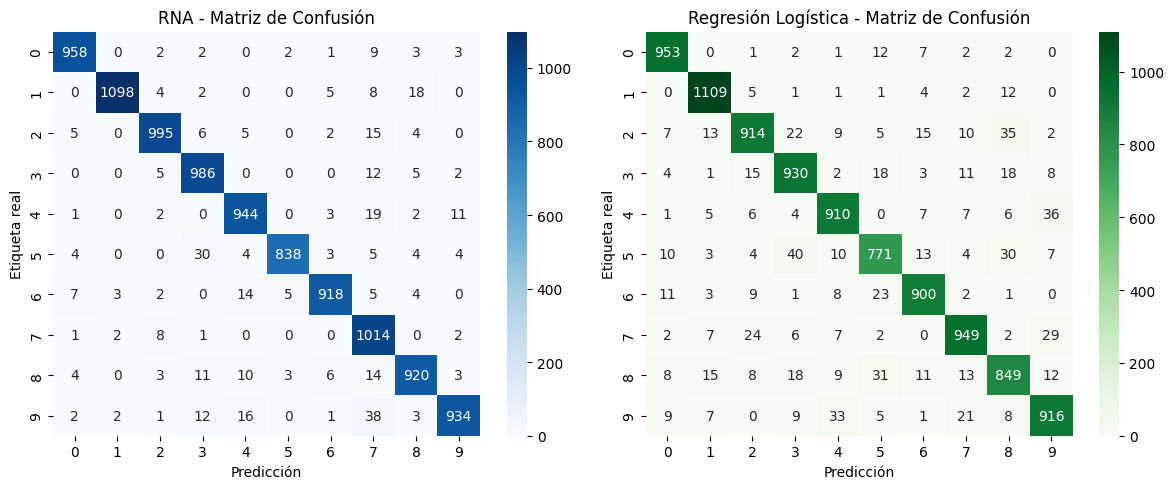

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Exactitud RNA :", accuracy_score(y_test, y_pred_nn))
print("Exactitud RL  :", accuracy_score(y_test, y_pred_lr))



# Matrices para cada modelo
cm_nn = confusion_matrix(y_test, y_pred_nn)
cm_lr = confusion_matrix(y_test, y_pred_lr)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("RNA - Matriz de Confusión")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Etiqueta real")

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Regresión Logística - Matriz de Confusión")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Etiqueta real")

plt.tight_layout()
plt.show()



---
## 8.2 Curvas de entrenamiento (solo RNA)

La gráfica muestra dos curvas de entrenamiento de una Red Neuronal Artificial (RNA):

Izquierda (Exactitud/Accuracy): porcentaje de aciertos en entrenamiento y validación a lo largo de las épocas.

Derecha (Pérdida/Loss): valor de la función de costo, que mide el error del modelo.

En ambos casos se grafican dos líneas:

Azul: datos de entrenamiento.

Naranja: datos de validación (datos que el modelo no vio durante el entrenamiento, usados para medir generalización).

---
---

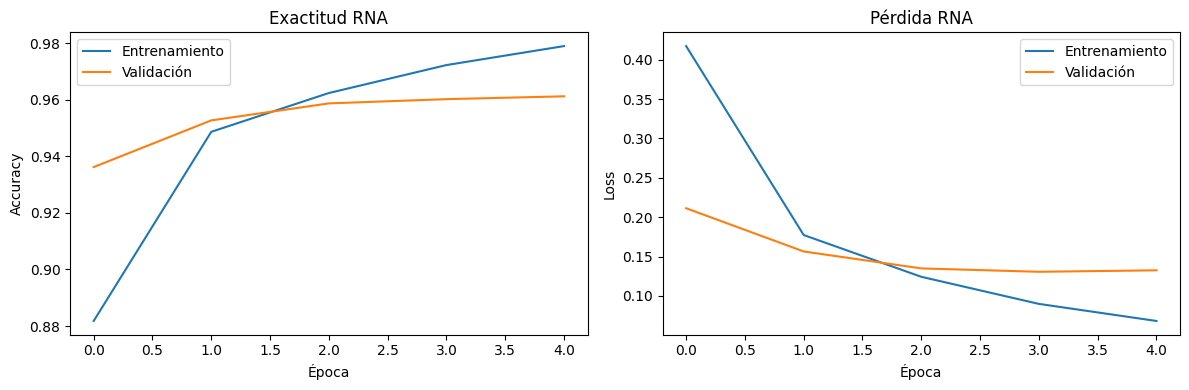

In [51]:
plt.figure(figsize=(12,4))

# Exactitud
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Entrenamiento")
plt.plot(history.history["val_accuracy"], label="Validación")
plt.title("Exactitud RNA")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()

# Pérdida
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Entrenamiento")
plt.plot(history.history["val_loss"], label="Validación")
plt.title("Pérdida RNA")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


---
## 8.3 Ejemplos de predicciones

Aquí seleccionamos algunas imágenes al azar. Cada recuadro indica el valor real y las predicciones de ambos modelos.

Pueden notar que en la mayoría de los casos los dos aciertan, pero en dígitos más confusos, como el 5 y el 8, la red neuronal tiende a equivocarse menos.

---
---

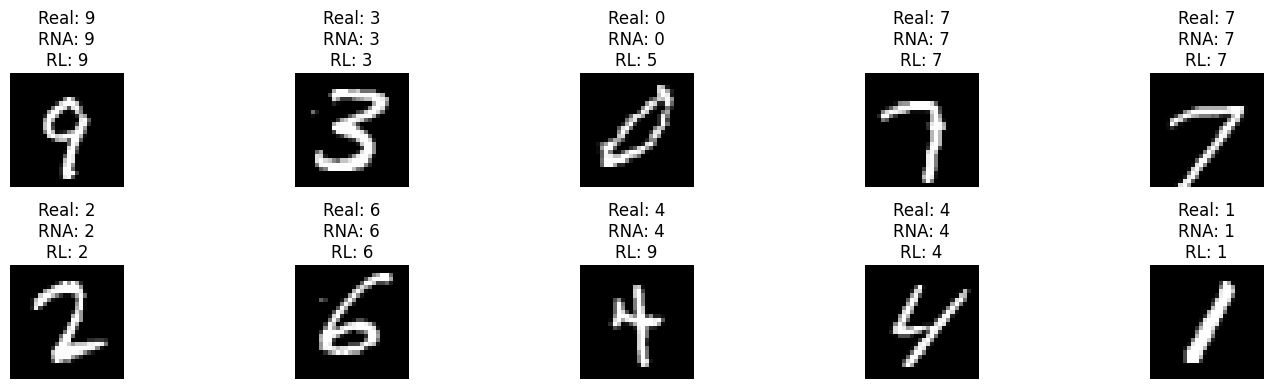

In [49]:
import numpy as np

# Elegimos 10 imágenes aleatorias del set de prueba
indices = np.random.choice(len(x_test), 10, replace=False)

plt.figure(figsize=(15,4))
for i, idx in enumerate(indices):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap="gray")
    plt.title(f"Real: {y_test[idx]}\nRNA: {y_pred_nn[idx]}\nRL: {y_pred_lr[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


---
## 9. Conclusiones

Las Redes Neuronales Artificiales (RNA) representan más que una técnica de modelado:
son un paradigma de pensamiento computacional que imita, a gran escala, la forma en que el cerebro procesa información.

- Impacto transversal: hoy son la base de avances disruptivos en vehículos autónomos, asistentes virtuales, descubrimiento de fármacos y sistemas de recomendación, transformando industrias enteras.

- Aprendizaje continuo: su fortaleza radica en la capacidad de adaptarse a nuevos datos y contextos, convirtiéndose en sistemas que mejoran con la experiencia.

- Reto de interpretabilidad: a pesar de su éxito, comprender sus decisiones sigue siendo un desafío, impulsando la investigación en IA explicable y métodos de visualización de redes.

- Proyección futura: combinadas con computación cuántica y hardware especializado, se espera que las RNA permitan resolver problemas antes considerados intratables.

<div align="center" style="font-size:120%; font-weight:bold; margin-top:12px;"> Las RNA no solo resuelven problemas de hoy: definen el camino de la inteligencia artificial del mañana.
</div>

---
---


---
## Referencias

[1] OpenAI, Asistencia generada por el modelo GPT-5 de ChatGPT, 2025.

[2] N. Klingler, Artificial Neural Network: Everything You Need to Know, Viso.ai, Jan. 2023.

[3] J. Amat Rodrigo, Redes neuronales con Python, Ciencia de Datos, May. 2021.

[4] S. Haykin, Neural Networks and Learning Machines, 3rd ed., Pearson, 2009.


---
---